# Hypothesis Testing
- Hypothesis is a claim made by a person / organization. The claim is usually about the population parameters such as mean or proportion and we seek evidence from a sample for the support of the claim (Example: average salary of Data Scientist with 1 year experience is Rs 5 Lakhs per annum).
- Hypothesis testing is a process used for either rejecting or retaining null hypothesis. 
- There are two types of hypotheis: 
    - Null Hypothesis, $H_0$: Hypothesis of no difference
    - Alternative Hypothesis, $H_1$: Hypothesis of difference

**Examples of some claims:**
*  If you drink Horlicks, you can grow taller, stronger and sharper.
*  Two - minute for cooking noodles. (or eating !!)
*  Married people are happier than singles (Anon - 2015).
*  Smokers are better sales people.

*Hypothesis testing is used for checking the validity of the claim using evidence found in sample data.*

- **Type I error:** Occurs when we reject a true null hypothesis
- **Type II error:** Not rejecting a false null hypothesis

1. **Normal Distribution** (z distribution), **<30 data points** (t distribution), chi square distribution, f distribution:
   - *When the sample (# of data points) starts to go above 30, a t dist starts to follow z dist)*
2. **Significance level:** Measure how frequently the conclusion will be wrong. (Type I error - alpha)
3. **Rejection Region:** A range of values such that if the test statistics (say z score) falls into that range, we decide to reject null hypothesis in favour of alternative hypothesis
    - If calculated test statistics < table value then accept the null hypothesis
    - If calculated test statistics > table value(falls in rejection region) then reject null hypothesis
4. **P value:** "Strength of evidence in support of a null hypothesis".
   - It is the probability of observing a test statistics as extreme as the one computed, assuming that the null hypothesis is true

## Parametric and Non-parametric tests
- A parametric test makes assumptions about a population’s parameters, and a non-parametric test does not assume anything about the underlying distribution.
- A parametric test makes assumptions about a population’s parameters:
    - Data in each group should be **normally distributed**.
    - Data in each group should be **sampled randomly** and independently.
    - There should be **no extreme outliers** in the data.
    - Data in each group should have approximately **equal variance**.
- A non-parameteric test is used: 
    - For **ordinal and categorical** data.
    - If there is a doubt about the **normality** of our data
- Examples of parametric tests: z-test, t-test
- Examples of non-parametric tests: $\chi^2$ test, Kruskal Walli's test etc.

## One Sample Z-test

Population mean and standard deviation is known, population is normal(or approx): 
- $z=\frac{\bar{x}-\mu}{\frac{\sigma}{\sqrt(n)}}$
- To apply normal distribution: population mean, population standard deviation, N>=30

### Working with data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np

In [3]:
# Read data
data = pd.read_excel('datasets/Hypothesis Testing.xlsx', sheet_name='One Sample z').iloc[:,0]
data.head()

0    55.000000
1    54.000000
2    62.589736
3    53.000000
4    59.372035
Name: Minutes, dtype: float64

In [4]:
# Print shape of the data
print('Shape:', data.shape)

Shape: (35,)


- A random sample of 35 young adult men was sampled. 
- Each person was asked how many minutes of sports he watched on television daily. The responses are listed here. It is known that σ = 10.
- At 5% significance level can we conclude that mean amount of television watched daily by all young adult men is greater than 50 minutes.

In [6]:
# N = 35, pop std = 10, pop mean = 50, alpha = 0.05
# Description of the data
data.describe()

count    35.000000
mean     51.058857
std       7.445037
min      37.347848
25%      46.160073
50%      50.400279
75%      54.869239
max      65.960233
Name: Minutes, dtype: float64

##### Let us define the hypothesis:
- $H_0$: Average amount of daily televious minutes watched by young adult men is 50. (Sample mean is same as population mean) 
- $H_1$: Average amount of daily televious minutes watched by young adult men >50. (Sample mean is >50)
- This can be written as -
    - $H_0 : \mu = 50 $  
    - $H_1 : \mu > 50 $

In [7]:
# Performed Z-test with the help of statsmodels
from statsmodels.stats import weightstats as wst
z_stat, p = wst.ztest(data, value = 50, alternative='larger') # Right tailed test
if p < 0.05:
    print('P-value:', round(p, 4), 'which is lesser than alpha. Reject the null hypothesis.')
else:
    print('P-value:', round(p, 4), 'which is greater than alpha. Accept the null hypothesis.')

P-value: 0.2001 which is greater than alpha. Accept the null 


In [10]:
print('Z-Statistic:', z_stat.round(3))
print('P-Value:', p.round(3))

Z-Statistic: 0.841
P-Value: 0.2


**Inferences Drawn:**
- z-statistic is 0.8414. P-value is 0.2001 which means P-value > 0.05 (alpha)
- So, **accept the null hypothesis**. That is, we don't have enough evidence to reject the null hypothesis.

### Example with two-way hypothesis
- Consider a dataset containing BP of 34 patients.
- $H_0$: The average BP of patients before the treatment is 146. That is, $H_0 = 146 $
- $H_1$: The Average BP of patients before the treatment is not 146. That is, $H_1 \ne 146 $

In [11]:
df= pd.read_excel('datasets/BP.xlsx')
df.head()

,patient_name,patient_ sex,patient_agegrp,patient_bp_before,patient_bp_after
0,1,Male,30-45,142,153
1,2,Male,30-45,163,170
2,3,Male,30-45,143,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [12]:
print('Shape:', df.shape)

Shape: (34, 5)


In [13]:
df['patient_ sex'].value_counts()

patient_ sex
Male    34
Name: count, dtype: int64

In [14]:
df.describe().round(3)

,patient_name,patient_bp_before,patient_bp_after
count,34.000,34.000,34.000
mean,17.500,155.765,150.647
std,9.958,11.479,15.952
min,1.000,133.000,125.000
25%,9.250,148.250,136.000
50%,17.500,153.500,151.500
75%,25.750,162.750,161.500
max,34.000,184.000,184.000


In [15]:
z_stat, p = wst.ztest(df['patient_bp_before'], value=146)
if p < 0.05:
    print("Null hyphothesis rejected!")
else:
    print("Null hyphothesis accepted!")

Null hyphothesis rejected!


In [19]:
print('P-value:', p.round(10))
print('Z-statistic:', z_stat.round(3))

P-value: 7.04e-07
Z-statistic: 4.96


**Inferences drawn:**
- There is no enough evidance to say that the the sample has the average BP (before the treatment) as 146. That is, there is no guarantee that the given sample has been drawn from the population where population has average BP (before) as 146.
- Or, the sample drawn may be biased - more of a data analyst inference. 
    - As a data analyst, we can see that all 34 records here are of Males.
    - Hence, the sample is not a true representaiton of the population, because, there is a sample bias. 
    - However, stratified sampling should have been benefial.


### Example of working with real data 
Consider the UsedCarsPrice dataset.
1. - $H_0$: The average kilometer is 60000.
   - $H_1$: The average kilometer is not 60000.
-----
2. - $H_0$: The average price of the car is 12000.
   - $H_1$: The average price of the car is not 12000.

In [21]:
data2 = pd.read_csv('datasets/UsedCarsPrice.csv', index_col = 0, na_values = ['??', '????'])
data2.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170


In [22]:
print('Shape:', data2.shape)

Shape: (1436, 10)


In [23]:
data2 = data2.dropna()
data2.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
5,12950,32.0,61000.0,Diesel,90.0,0.0,0,2000,3,1170


In [24]:
print('Shape:', data2.shape)

Shape: (1096, 10)


In [25]:
data2['FuelType'].value_counts()

FuelType
Petrol    968
Diesel    116
CNG        12
Name: count, dtype: int64

In [26]:
ztest, p = wst.ztest(data2['Price'], value=12000)
if p < 0.05:
    print("Null hyphothesis rejected!")
else:
    print("Null hyphothesis accepted!")

Null hyphothesis rejected!


In [27]:
print('P-value:', p.round(10))
print('Z-statistic:', ztest.round(3))

P-value: 0.0
Z-statistic: -11.507


In [28]:
ztest, p = wst.ztest(data2['KM'], value=60000)
if p < 0.05:
    print("Null hyphothesis rejected!")
else:
    print("Null hyphothesis accepted!")

Null hyphothesis rejected!


In [29]:
print('P-value:', p.round(10))
print('Z-statistic:', ztest.round(3))

P-value: 0.0
Z-statistic: 8.06


## One sample T-test
- T-test is used to check whether the sample is a true representation of popultation.
- That is, whether the sample has features similar to that of population.
- Population mean is known and population standard deviation is unknown, population is normal. $t=\frac{\bar{x}-\mu}{\frac{s}{\sqrt(n)}}$
- In statistics, $\mu$ and $\sigma$ are used to represent population mean and population standard deviation respectively.
- $\bar{x}$ and $s$ are used to represent sample mean and sample standard deviation

In [30]:
data = pd.read_excel('datasets/Hypothesis Testing.xlsx', sheet_name='One sample T').iloc[:,0]
data.head()

0    3.03
1    6.33
2    6.50
3    5.22
4    3.56
Name: D.Time, dtype: float64

In [32]:
# Description of the data
data.describe().round(3)

count    12.000
mean      5.688
std       1.580
min       3.030
25%       4.750
50%       5.775
75%       6.565
max       7.980
Name: D.Time, dtype: float64

**Define null and alternative hypothesis**
- $H_0$: Average delivery time is 6 hours. 
- $H_1$: Average delivery time is less than 6 hours

In [33]:
# Sample mean < population mean : left tailed --> p(x)
from scipy.stats import ttest_1samp

# pass data and population mean as parameters
ttest_1samp(data, 6)    

TtestResult(statistic=-0.6849867420895185, pvalue=0.5075293854463145, df=11)

In [34]:
# The p-value obtained above is for two-tailed test. So, One tailed probability is to divide the ans by 2.
print('Answer:', 0.5075/2)

Answer: 0.25375


**Inferences drawn:**
- P-value 0.25375 > 0.05 (alpha), hence **accept the $H_0$**.
- The given sample is drawn from the population with mean 6.

## Two sample Tests

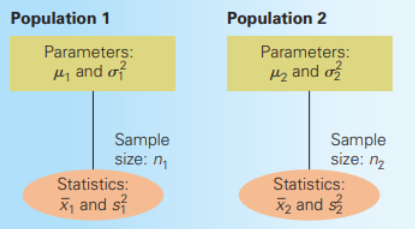

Inference about difference between two means

- Independent samples
- Sampling distribution of $\bar{x_1} - \bar{x_2}$ is normally distributed if populations are normally distributed or approx. normally distributed.

## Two sample Z-Test

The z-statistic is given by the formula: $z = \frac{(\bar{x}_1 - \bar{x}_2) - (\mu_1 - \mu_2)}{\sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}}$

The interval estimator is given by: $(\bar{x}_1 - \bar{x}_2) \pm z_{\alpha/2} \cdot \sqrt{\frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}}$

### Example
Recent studies seem to indicate that using a cell phone while driving is dangerous. One reason for this is that a drivers reaction times may slow while he or she is talking on the phone. Researchers at Ohio University measured the reaction times of a sample of drivers who owned a car, phone. Half the sample was tested while on the phone and the other half was not on the phone. Can we conclude that reaction times are slower for drivers using cell phones?

- $H_0$: Reaction time is same for drivers who use cell phones compared to who don't.
- $H_1$: Reaction time is more for drivers who use cell phones compared to who don't.

In [35]:
data = pd.read_excel('datasets/Hypothesis Testing.xlsx', sheet_name = 'Two sample z').iloc[:,0:2]

In [36]:
print(data.shape)

(125, 2)


In [37]:
data.head()

,Phone,Not
0,0.596,0.620
1,0.708,0.523
2,0.646,0.652
3,0.725,0.652
4,0.649,0.506


In [40]:
from statsmodels.stats import weightstats as test

z_stat, p = test.ztest(x1 = data['Phone'], x2= data['Not'], alternative= 'larger')

print('P-value:', p.round(15))
print('Z-statistic:', z_stat.round(3))

P-value: 7.92e-13
Z-statistic: 7.067


**Inferences drawn** 
- P-value < 0.05 (alpha), hence **reject the $H_0$.**
- We do not have enough evidance to say the response time of the drivers using mobile and not using mobile are same.

## Two Sample T Test

- The test statistic for $\mu_1 - \mu_2$ when $\sigma_1^2 = \sigma_2^2$ is $t = \frac{(\bar{X}_1 - \bar{X}_2) - (\mu_1 - \mu_2)}{\sqrt{\frac{S_1^2}{n_1} + \frac{S_2^2}{n_2}}}$
- If n1 and n2 < 30, compare two means of population assuming that variance of the population are equal

### Example
A number of restaurants feature a device that allows credit card users to swipe their cards at the table. It allows the user to specify a percentage or a dollar amount to leave as a tip. In an experiment to see how it works, a random sample of credit card users was drawn. Some paid the usual way, and some used the new device. The percent left as a tip was recorded and listed below. Can we infer that users of the device leave larger tips?

In [41]:
df = pd.read_excel('datasets/Hypothesis Testing.xlsx', sheet_name='Two sample t').iloc[:,0:2]
df.head()

,Usual,Device
0,10.3,13.6
1,15.2,15.7
2,13.0,12.9
3,9.9,13.2
4,12.1,12.9


In [42]:
df.describe().round(3)

,Usual,Device
count,10.000,11.000
mean,12.620,14.200
std,1.718,1.614
min,9.900,12.100
25%,12.025,13.050
50%,12.600,13.600
75%,13.350,15.550
max,15.200,17.400


- $H_0$: Percentage of tip paid are same.
- $H_1$: Percentage of tip paid by device are higher.

In [28]:
n1 = 10   # number of people who are paying by usual method
n2 = 11   # number of people who are paying using device

In [44]:
#Two sample t test: Independent samples assuming equal variance
from scipy.stats import ttest_ind

t_stat, p = ttest_ind(df['Usual'].dropna(),df['Device'], equal_var= True)

print('P-value:', p.round(3))
print('T-statistic:', t_stat.round(3))

P-value: 0.043
T-statistic: -2.173


**Inferences drawn:**
- The p value 0.0426 obtained here is for two-sided test. So, for one-sided test (as per our H0 and H1), the actual p-value = 0.0426/2 = 0.0213. As p-value < alpha = 0.05, **reject the null hypothesis**. 
- So, tips paid by people with cash / usual paymnet method and through device are not same.

## $\chi^2$ (Chi-Square) test

### Working with real data

In [45]:
# Loading data
data = pd.read_excel('datasets/CreditCardData.xlsx')
data.head()

,Card_ID,Campaign_Responce,Registration_Date,Gender,Birth_Date
0,100005950,False,1998-11-18,M,1984-02-06
1,100022191,True,1999-09-15,F,1959-09-11
2,100025442,False,1998-05-12,M,1970-08-25
3,100026513,False,1999-02-12,M,1951-03-12
4,100039145,False,2000-08-12,M,1949-06-08


In [49]:
# Is there a relationship between Gender and Campaign_Responce?
data['Campaign_Responce'].value_counts(normalize= True)

Campaign_Responce
False    0.835017
True     0.164983
Name: proportion, dtype: float64

- $H_0$: There is no relationship between Gender and Campaign Responce. (independent)
- $H_1$: There is a relatinoship between Gender and Campaign Responce. (dependent)

In [50]:
# Contingency table : 
obs = pd.crosstab(data['Gender'], data['Campaign_Responce'])
obs

Campaign_Responce,False,True
Gender,,
F,102,25
M,146,24


In [55]:
# Import the chi-square related modules
from scipy.stats import chi2_contingency, chisquare

chi_sq_stat, p_value, deg_freedom, exp_freq = chi2_contingency(obs)
print('Chi-Square Statistic:', chi_sq_stat.round(3)) 
print('P-value:', p_value.round(3))
print('Degrees of Freedom:', deg_freedom)

Chi-Square Statistic: 1.256
P-value: 0.262
Degrees of Freedom: 1


**Inferences drawn:**
- P-value is 0.262 which is > 0.05 (alpha). Hence, **accept the $H_0$**
- We do not have enough evidance to say that gender has an influence on campaign response. That means, gender and response are independent of each other.

### Example
Consider UsedCarsPrice data. 
- $H_0$: There is no relationship between Gear Type (Automatic) and Fuel Type. (independent)
- $H_1$: There is a relatinoship between Gear Type (Automatic) and Fuel Type. (dependent)

In [56]:
data2 = pd.read_csv('datasets/UsedCarsPrice.csv', index_col = 0, na_values = ['??', '????'])
data2.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170


In [57]:
data2 = data2.dropna()
data2.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
5,12950,32.0,61000.0,Diesel,90.0,0.0,0,2000,3,1170


In [58]:
data2['Automatic'].value_counts(normalize= True)

Automatic
0    0.94708
1    0.05292
Name: proportion, dtype: float64

In [59]:
data2['FuelType'].value_counts(normalize= True)

FuelType
Petrol    0.883212
Diesel    0.105839
CNG       0.010949
Name: proportion, dtype: float64

In [60]:
# Contingency table : 
obs1 = pd.crosstab(data2['Automatic'], data2['FuelType'])
obs1

FuelType,CNG,Diesel,Petrol
Automatic,,,
0,12,116,910
1,0,0,58


In [72]:
from scipy.stats import chi2_contingency,chisquare

chi_sq_Stat, p_value, deg_freedom, exp_freq = chi2_contingency(obs1)
print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d'
       %(chi_sq_Stat, p_value,deg_freedom))

Chi-square statistic 8.09796 P value 0.017440 Degrees of freedom 2
